# Problem statement 

create a model which can predict the price of the car according to the features of the car,

# Importing Relevant Libraries

In [135]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: QtAgg


# Reading and Understanding the Data 

In [245]:
# Read the Dateset
car =pd.read_csv("G:\python\car_price.csv")

In [246]:
# lets see how dataset looks like 
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [247]:
# lets see the no of rows and columns we have 
car.shape

(205, 26)

In [248]:
# lets see the information of the dataset 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# Lets convert the Undefined values with the Nan Values 

In [249]:
car= car.replace({'?': np.nan})

# Lets change the Datatype from Object to Float

In [250]:
car.normalized_losses =  car.normalized_losses.astype('float')
car.bore =  car.bore.astype('float')
car.stroke =  car.stroke.astype('float')
car.peak_rpm =  car.peak_rpm.astype('float')
car.price = car.price.astype('float')
car.horsepower  = car.horsepower.astype('float')


# Lets see some summary

In [251]:

# describe function shows only numeric data 
car.describe()

,symboling,normalized_losses,drive_wheels,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Missing values 

In [252]:
car.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

# Lets fill the Nulls 

In [253]:
car.normalized_losses  = car.normalized_losses.fillna(car.normalized_losses.mean())
car.bore   = car.bore.fillna(car.bore.mean())
car.stroke  =car.stroke.fillna(car.stroke.mean())
car.peak_rpm  =car.peak_rpm.fillna(car.peak_rpm.mean())
car.horsepower  =car.horsepower.fillna(car.horsepower.mean())
car.num_of_doors  =car.num_of_doors.fillna('four')


In [254]:
car.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [255]:
car.isnull().sum()[car.isnull().sum()>0]

price    4
dtype: int64

In [256]:
car =car.dropna()

In [257]:
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Lets fill the Categorical Values with the Numeric Values 

In [258]:
from sklearn.preprocessing import LabelEncoder

In [259]:
le =LabelEncoder()

In [260]:
car[car.select_dtypes(include=['object']).columns]= car[car.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [261]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    int32  
 3   make               201 non-null    int32  
 4   num_of_doors       201 non-null    int32  
 5   aspiration         201 non-null    int32  
 6   wheel_base         201 non-null    int32  
 7   engine_location    201 non-null    int32  
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    int32  
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int32  
 16  engine_size        201 non

In [262]:
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Lets Split the Data into Train and Test 

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
car_train ,car_test = train_test_split(car,test_size =.2)

In [265]:
car_train_x = car_train.iloc[:,0:-1]
car_train_y = car_train.iloc[:,-1]

In [266]:
car_test_x = car_test.iloc[:,0:-1]
car_test_y = car_test.iloc[:,-1]

# Lets create a Linear Regression model on the Data 

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
linreg= LinearRegression()

In [269]:
linreg.fit(car_train_x, car_train_y)

LinearRegression()

In [270]:
Rsquare = linreg.score(car_train_x,car_train_y)
Rsquare

0.9060177940078714

In [271]:
N= car_train_x.shape[0]
K= car_train_x.shape[1]

In [272]:
Adj_Rsquare = 1-(1-Rsquare)* (N-1)/(N-K-1)
Adj_Rsquare

0.8884838003526235

In [273]:
car_train_x.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [274]:
linreg.coef_

array([ 1.37218668e+02, -7.00663173e+00,  3.39841076e+03,  2.64174313e+03,
        3.34270939e+01, -8.39377917e+02,  7.12955547e+02,  1.19161874e+04,
        1.61622398e+02, -2.11260603e+02,  6.55539698e+01,  4.01687141e+02,
        2.51275709e+02,  2.72030176e-01,  1.81394740e+01,  1.15842413e+03,
        1.39663312e+02,  7.55764387e+01, -8.42821709e+02, -3.43027984e+03,
        3.63001407e+02, -2.27962010e+01,  2.00247683e+00, -2.68840115e+01,
        4.03262565e+00])

In [275]:
linreg.intercept_

-71531.14604997008

In [276]:
pred_train = linreg.predict(car_train_x)
pred_test = linreg.predict(car_test_x)

In [277]:
err_test= car_test_y - pred_test
err_test

4       3344.052894
121     1873.706194
110    -8166.009837
108    -6959.824099
49    -10226.623998
112    -3274.785758
199     4025.749554
114    -4965.971496
183      -60.222704
201      300.490380
68      2760.827207
78       387.067466
169    -2429.723965
72      6480.410235
166      481.901422
106    -2302.992193
177     2255.677255
19     -1704.028961
192     3156.704217
83         3.967326
91       291.442901
88      1658.854530
168    -3615.021429
93      1590.308178
170    -2093.921745
125     6648.639724
130      169.239633
160     2718.216746
145     1161.247669
100      -50.042755
37     -3117.907856
54       997.409248
141    -1353.077453
98       725.914876
7         17.331945
66      4134.109841
198     3353.908427
142       -6.733623
96      1118.412605
52       -63.589609
30      3184.422674
Name: price, dtype: float64

In [278]:
mse = np.mean(np.square(err_test))
mse

12045133.1677506

In [279]:
rmse= np.sqrt(mse)
rmse

3470.609912933259

In [280]:
mape= np.mean(np.abs(err_test*100/ car_test_y))
mape

18.778895732175062

In [281]:
car.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [282]:
import seaborn as sns 
%matplotlib inline

C:\Users\karti\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


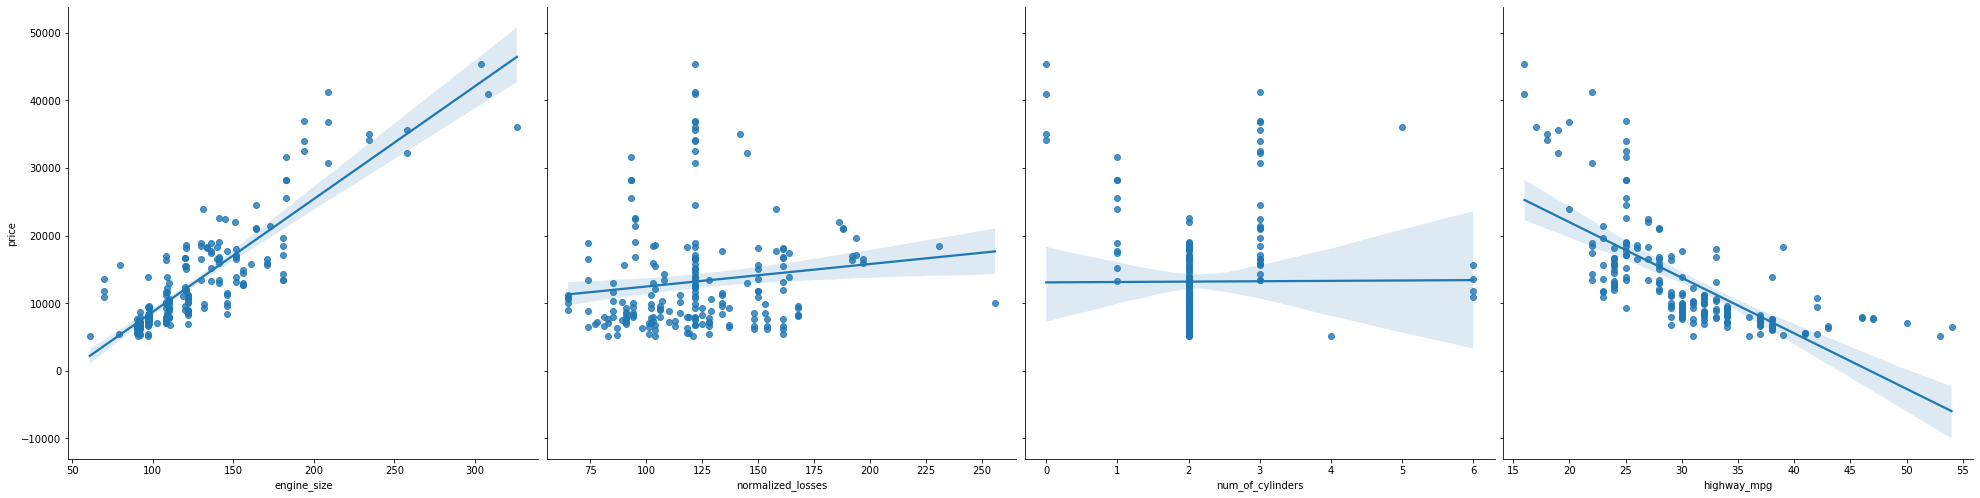

In [283]:
sns.pairplot(car,x_vars=['engine_size','normalized_losses','num_of_cylinders','highway_mpg'], y_vars ='price', size =7 , aspect = 1, kind= 'reg')
# compare the x veriable with y veriable price 

In [284]:
err_train = car_train_y - pred_train

In [285]:
np.mean(err_train)

-6.5483618527650835e-12

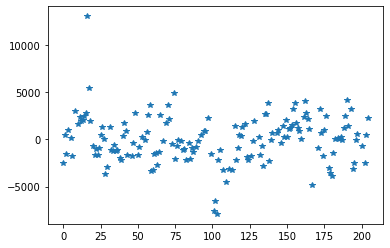

In [286]:
plt.plot(err_train, '*')

(array([ 2.,  1.,  0.,  0.,  2.,  2.,  7.,  8., 18., 16., 14., 26., 15.,
        15., 14., 11.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-7891.06081951, -7193.4386061 , -6495.81639269, -5798.19417928,
        -5100.57196586, -4402.94975245, -3705.32753904, -3007.70532562,
        -2310.08311221, -1612.4608988 ,  -914.83868538,  -217.21647197,
          480.40574144,  1178.02795486,  1875.65016827,  2573.27238168,
         3270.89459509,  3968.51680851,  4666.13902192,  5363.76123533,
         6061.38344875,  6759.00566216,  7456.62787557,  8154.25008899,
         8851.8723024 ,  9549.49451581, 10247.11672922, 10944.73894264,
        11642.36115605, 12339.98336946, 13037.60558288]),
 <BarContainer object of 30 artists>)

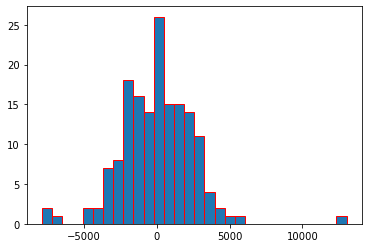

In [287]:
plt.hist(err_train, bins =30 ,edgecolor ='r')

In [288]:
pred_actual_df = pd.DataFrame()

In [289]:
pred_actual_df['Actual']= car_train_y   # it is used to create the column
pred_actual_df['predict']= pred_train 

In [290]:
pred_actual_df.head()

,Actual,predict
159,7788.0,7740.652825
191,13295.0,11856.595256
146,7463.0,7867.746667
186,8495.0,8215.935291
102,14399.0,20907.827879


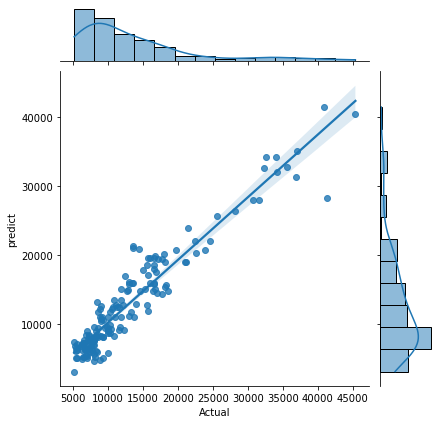

In [291]:
sns.jointplot(x= 'Actual', y = 'predict', data = pred_actual_df , kind= 'reg')

In [292]:
def remove_outliers(car, col, k):   # all the steps are explain in the book
    mean = car[col].mean()
    sd = car[col].std()
    final_list = [ x for x in car[col] if (x > mean -k * sd)]  
    final_list = [ x for x in final_list if ( x < mean + k * sd)]
    df1 = car.loc[car[col].isin(final_list)]; print (df1.shape )
    print("Number of outliers removed ==>", car.shape[0] - df1.shape[0])

In [293]:
remove_outliers(car,'price', 2)

(187, 26)
Number of outliers removed ==> 14


# linear regression model on Lasso

In [294]:
from sklearn. linear_model import Lasso
lasreg = Lasso()

In [295]:
lasreg.fit(car_train_x, car_train_y)

Lasso()

In [296]:
lasreg.score(car_train_x, car_train_y)

0.9059872570468744

In [297]:
pred_train_las = lasreg.predict(car_train_x)
pred_test_las = lasreg.predict(car_test_x)

In [298]:
err_train_las = car_train_y  - pred_train_las
err_test_las = car_test_y - pred_test_las

In [299]:
mse_train_las = np.mean(np.square (err_train_las))
mse_test_las = np.mean(np.square (err_test_las))

In [300]:
mse_train_las

6150813.026312928

In [301]:
mse_test_las

11880948.702977773

In [302]:
mape_train = np.mean(np.absolute(err_train_las* 100/ car_train_y))
mape_train

15.576958136524084

In [303]:
mape_test = np.mean(np.absolute(err_test_las* 100/ car_test_y))
mape_test

18.74676274144015

# linear regression model on ridge

In [304]:
from sklearn.linear_model import Ridge

In [305]:
rid_reg = Ridge()

In [306]:
rid_reg.fit(car_train_x, car_train_y)

Ridge()

In [307]:
rid_reg.score(car_train_x, car_train_y)

0.9024281337828577

In [308]:
pred_train_rig = rid_reg.predict(car_train_x)
pred_test_rig = rid_reg.predict(car_test_x)

In [309]:
err_train_rig = car_train_y  - pred_train_rig
err_test_rig = car_test_y - pred_test_rig

In [310]:
mse_train_reg = np.mean(np.square (err_train_rig))
mse_test_reg = np.mean(np.square (err_test_rig))

In [311]:
mse_train_reg

6383669.775801485

In [312]:
mse_test_reg

11226742.619767869

In [313]:
mape_train_rig = np.mean(np.absolute(err_train_rig* 100/ car_train_y))
mape_test_rig = np.mean(np.absolute(err_test_rig* 100/ car_test_y))

In [314]:
mape_train_rig

15.908886395809603

In [315]:
mape_train_rig = np.mean(np.absolute(err_train_rig* 100/ car_train_y))
mape_test_rig 

18.983361806888297

# compare  the coef of the 3 different models

In [316]:
car_coef = pd.DataFrame()

In [317]:
car_coef['lin'] =linreg.coef_
car_coef['rid'] =rid_reg.coef_
car_coef['las'] =lasreg.coef_

In [318]:
car_coef

,lin,rid,las
0,137.218668,157.009751,141.755103
1,-7.006632,-7.945404,-7.124527
2,3398.410760,310.964128,1839.604086
3,2641.743134,1686.168854,2480.746990
4,33.427094,-182.566965,5.526788
5,-839.377917,-969.280247,-850.435346
6,712.955547,786.827690,723.171025
7,11916.187433,6859.432600,11786.923949
8,161.622398,158.739369,161.028517
9,-211.260603,-197.132864,-209.338181


In [319]:
car_coef[car_coef['las']==0].shape

(1, 3)

In [320]:
car_coef.shape

(25, 3)

# Observation
1. From the above obeservation we can say that all three model are same according to the accuracy score.
2. But on the basis of mean absulate percentage error (MAPE) the lasso model is better than any other.
3. Because lasso model have 90% of accuracy and 15% of of mape.


In [321]:
from sklearn import preprocessing


car_train_x = preprocessing.scale(car_train_x)
car_test_x = preprocessing.scale(car_test_x)

In [322]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(verbose=1)

In [323]:
sgd_model.fit(car_train_x,car_train_y)

-- Epoch 1
Norm: 2954.94, NNZs: 25, Bias: 6140.782233, T: 160, Avg. loss: 61863951.955115
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3100.37, NNZs: 25, Bias: 8562.716223, T: 320, Avg. loss: 22653540.146312
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3519.28, NNZs: 25, Bias: 9986.687027, T: 480, Avg. loss: 12557020.835352
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3708.43, NNZs: 25, Bias: 10919.943414, T: 640, Avg. loss: 8190146.752660
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3659.29, NNZs: 25, Bias: 11537.282143, T: 800, Avg. loss: 5926927.434795
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3858.28, NNZs: 25, Bias: 11968.114532, T: 960, Avg. loss: 5044361.879357
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3931.60, NNZs: 25, Bias: 12283.776782, T: 1120, Avg. loss: 4406731.739558
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4072.66, NNZs: 25, Bias: 12515.612170, T: 1280, Avg. loss: 4047021.164800
Total training time: 0.00 seconds

SGDRegressor(verbose=1)

In [324]:
sgd_model.score(car_train_x,car_train_y)

0.9008423846167782

In [325]:
car.corr()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,4.662638e-01,0.196735,-0.054615,0.672344,-0.600333,-0.053056,2.123389e-01,-0.535987,-0.129645,...,-0.110581,0.091601,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized_losses,0.466264,1.000000e+00,0.101546,-0.006911,0.361368,-0.251775,0.317214,9.412733e-17,-0.056661,-0.254356,...,0.112360,0.230311,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
Fuel_type,0.196735,1.015463e-01,1.000000,-0.408228,0.186681,-0.147654,-0.131096,4.091700e-02,-0.307237,-0.109330,...,-0.070779,0.042824,-0.054458,-0.241064,-0.985231,0.169053,0.475812,-0.265676,-0.198690,-0.110326
make,-0.054615,-6.910980e-03,-0.408228,1.000000,-0.063017,0.072079,0.094469,-5.749596e-02,0.256889,0.071254,...,0.110040,0.282269,0.227816,0.218233,0.307522,0.251127,-0.190057,-0.189237,-0.241851,0.179578
num_of_doors,0.672344,3.613676e-01,0.186681,-0.063017,1.000000,-0.688542,0.115920,1.423403e-01,-0.445245,-0.146172,...,-0.024094,-0.001246,-0.119222,0.007672,-0.169164,0.102889,0.232054,0.027617,0.045787,-0.042435
aspiration,-0.600333,-2.517751e-01,-0.147654,0.072079,-0.688542,1.000000,-0.161004,-2.783504e-01,0.407128,0.090621,...,-0.063692,-0.054810,0.021233,-0.013401,0.134622,-0.136472,-0.105713,0.014217,-0.021328,-0.072933
wheel_base,-0.053056,3.172142e-01,-0.131096,0.094469,0.115920,-0.161004,1.000000,1.493687e-01,0.467661,-0.034844,...,0.526027,0.435926,0.471838,0.078738,0.120125,0.545892,-0.035765,-0.469240,-0.472893,0.588333
engine_location,0.212339,9.412733e-17,0.040917,-0.057496,0.142340,-0.278350,0.149369,1.000000e+00,-0.189115,0.053312,...,0.199367,0.106735,0.188413,-0.139339,-0.020467,0.342117,0.201917,-0.157132,-0.102964,0.331062
drive_wheels,-0.535987,-5.666124e-02,-0.307237,0.256889,-0.445245,0.407128,0.467661,-1.891150e-01,1.000000,0.073930,...,0.572027,0.381273,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
body_style,-0.129645,-2.543563e-01,-0.109330,0.071254,-0.146172,0.090621,-0.034844,5.331188e-02,0.073930,1.000000,...,-0.084770,0.144769,0.236814,-0.203691,0.132554,-0.064462,-0.212912,0.065761,0.059111,-0.163646


In [326]:
cr = car.drop(['price'],axis =1)

In [327]:
car.columns

Index(['symboling', 'normalized_losses', 'Fuel_type', 'make', 'num_of_doors',
       'aspiration', 'wheel_base', 'engine_location', 'drive_wheels',
       'body_style', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [332]:
col_name=list(cr.columns)

In [333]:
corr_list=[]
for cols in col_name:
    corr=cr[cols].corr(car.price)
    corr_list.append(corr)
    print(corr_list)

[-0.08239118716962357]
[-0.08239118716962357, 0.13399873429274337]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413, -0.04243534269811203]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413, -0.04243534269811203, -0.07293257127569955]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413, -0.04243534269811203, -0.07293257127569955, 0.5883330641805204]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413, -0.04243534269811203, -0.07293257127569955, 0.5883330641805204, 0.33106186700991636]
[-0.08239118716962357, 0.13399873429274337, -0.11032556467564852, 0.17957848135197413, -0.04243534269811203, -0.07293257127569955, 0.5883330641805204, 0.33106186700991636, 0.5846418222655079]
[-0.08239118716962357, 0.

In [334]:
df2=pd.DataFrame()


df2['Corelation']=corr_list
df2['Column']=col_name

df2

,Corelation,Column
0,-0.082391,symboling
1,0.133999,normalized_losses
2,-0.110326,Fuel_type
3,0.179578,make
4,-0.042435,num_of_doors
5,-0.072933,aspiration
6,0.588333,wheel_base
7,0.331062,engine_location
8,0.584642,drive_wheels
9,-0.163646,body_style


# Observation
1. curb_weight,wheel_base,width,engine_size,fuel_system,bore,horsepower
   these x veriable have a high positive correlation with price.
2. highway_mpg,city_mpg,body_style have a negetive correlation with the price .